In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [10]:
df = pd.read_csv(r'/Users/bendavid/Desktop/Data/state_list_all.csv')
df.dropna()

,STATE,Median personal earning white,Median personal earning black,Difference_Income_Personal,White poverty rate,Black poverty rate,Difference_poverty,Unemployment white,Unemployment black,Difference_unemployment,...,White education index,White income index,Difference education index,Education spending,GDP per capita,Public assistance per capita,Minimum wage,Median peronal earning,Poverty rate,Remote rate
2,Arizona,35370,26466.0,8904.0,11.036635,24.006826,12.970191,5.600465,10.497329,4.896864,...,5.363295,5.495628,0.947876,8238,44596.72,31.927054,10.00,30686.22761,17.372516,60.819197
3,Arkansas,29783,21467.0,8316.0,14.501356,33.857216,19.355861,4.940988,10.711158,5.770170,...,4.382345,4.008140,0.756640,10138,40641.87,184.675059,8.50,28117.17686,19.066288,55.827052
4,California,44344,31258.0,13086.0,10.036330,22.481444,12.445114,6.192211,11.923409,5.731198,...,6.223212,7.107686,1.558498,12497,67670.80,254.669724,10.50,32768.98594,15.343688,60.692573
5,Colorado,37842,30200.0,7642.0,8.247861,19.913807,11.665945,4.531674,9.714240,5.182566,...,6.373094,5.803388,2.153195,10201,59618.50,0.000000,9.30,35441.89990,11.490504,64.884788
6,Connecticut,45599,30269.0,15330.0,6.063988,20.470458,14.406471,5.244740,12.767315,7.522574,...,6.733497,7.197037,2.482233,20634,74542.31,108.051328,10.10,40436.49043,10.540539,65.991883
7,Delaware,38737,29400.0,9337.0,7.460182,20.152974,12.692792,5.496240,6.813388,1.317148,...,5.404632,6.134823,1.137370,15638,75382.46,29.600374,8.25,35913.56089,12.425640,63.298519
9,Florida,32279,23321.0,8958.0,11.029751,25.153385,14.123635,5.949461,11.502387,5.552926,...,5.322829,5.092495,1.492107,9346,45943.47,10.211495,8.10,29524.20667,15.702154,61.416032
10,Georgia,35263,25385.0,9878.0,11.097398,24.832836,13.735439,5.226513,11.071694,5.845181,...,5.340197,5.429173,1.098397,10809,51676.61,4.111657,5.15,31095.67811,17.046800,60.665125
13,Illinois,38570,25465.0,13105.0,8.679904,28.205952,19.526048,4.955105,16.432633,11.477528,...,6.027994,5.692095,1.813433,15740,62414.29,14.618979,8.25,34604.73099,13.561595,61.190855
14,Indiana,31213,23604.0,7609.0,11.571496,28.370927,16.799431,4.966432,13.005372,8.038939,...,4.729787,4.540558,0.875399,10262,52252.11,60.879076,7.25,30872.57699,14.541378,55.650542


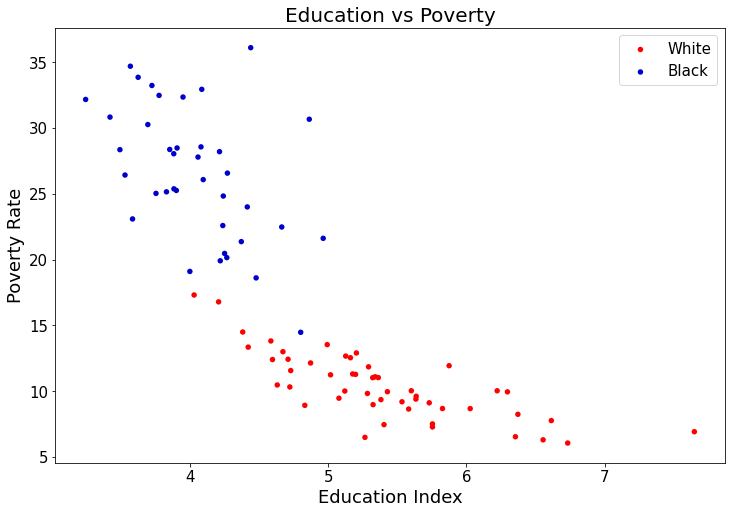

In [11]:
# Create a correlation plot

fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(df['White education index'], df['White poverty rate'], c='red', edgecolors='none', s=30, label='White')
axs.scatter(df['Black education index'], df['Black poverty rate'], c='mediumblue', edgecolors='none', s=30, label='Black')
plt.title("Education vs Poverty", fontsize=20)
axs.set_xlabel("Education Index", fontsize=18)
axs.set_ylabel("Poverty Rate", fontsize=18)
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})

plt.show()

In [12]:
x_vals = df['Poverty rate'].values
y_vals = df['Black poverty rate']

reg_model_1 = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model_1.summary())

/Users/bendavid/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Black poverty rate   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 26 Dec 2020   Prob (F-statistic):                nan
Time:                        12:38:57   Log-Likelihood:                    nan
No. Observations:                  51   AIC:                               nan
Df Residuals:                      49   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
x1                nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         69.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
x_vals = df['Poverty rate'].values
y_vals = df['White poverty rate']

reg_model_2 = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model_2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     White poverty rate   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     54.53
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           1.69e-09
Time:                        12:38:57   Log-Likelihood:                -99.813
No. Observations:                  51   AIC:                             203.6
Df Residuals:                      49   BIC:                             207.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0466      1.159      1.765      0.084      -0.283       4.376
x1             0.5879      0.080      7.385      0.000       0.428       0.748
==============================================================================
Omnibus:                        3.392   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                3.093
Skew:                           0.062   Prob(JB):                        0.213
Kurtosis:                       4.200   Cond. No.                         69.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# correlation between education index and poverty rate

df['Black education index'].corr(df['Black poverty rate'])

-0.4927406675422089

In [15]:
df_new = df.dropna(subset=['Black education index'])
stats.pearsonr(df_new['Black poverty rate'], df_new['Black education index'])

(-0.4927406675422089, 0.0016731892266333536)

In [16]:
stats.pearsonr(df_new['White poverty rate'], df_new['White education index'])

(-0.8529677329299339, 1.0488301444698696e-11)

In [17]:
# EDUCATION INDEX T-TEST 

In [18]:
def CI_mean_diff(list1, list2):
    s1 = np.var(list1)
    s2 = np.var(list2)
    n1 = len(list1)
    n2 = len(list2)
    se2 = s1/n1 + s2/n2
    se = np.sqrt(se2)

    diff = np.mean(list1) - np.mean(list2)
    low = diff - 1.96 * se
    up = diff + 1.96 * se
    print("The average difference is:", diff)
    print("The 95% CI is: ({}, {})".format(low, up))

In [19]:
CI_mean_diff(df_new['White education index'], df_new['Black education index'])

The average difference is: 1.3707326952105268
The 95% CI is: (1.0915958077487036, 1.64986958267235)


In [20]:
1.64986958267235 - 1.0915958077487036

0.5582737749236464

In [21]:
# Find the p-value

from scipy import stats

t_val, p_val = stats.ttest_ind(df_new['White education index'],
                               df_new['Black education index'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 9.497311342976968
p-value: 3.2638074851892256e-13


In [22]:
# These data provide evidence that the mean education index is much 
# higher among white people than black (p < 0.001; two sample t-test).
# The White education index mean was estimated to exceed the Black education 
# index mean by 0.56 (95% CI = [1.09, 1.65])

In [23]:
# POVERTY INDEX T-TEST

In [24]:
def CI_mean_diff(list1, list2):
    s1 = np.var(list1)
    s2 = np.var(list2)
    n1 = len(list1)
    n2 = len(list2)
    se2 = s1/n1 + s2/n2
    se = np.sqrt(se2)

    diff = np.mean(list1) - np.mean(list2)
    low = diff - 1.96 * se
    up = diff + 1.96 * se
    print("The average difference is:", diff)
    print("The 95% CI is: ({}, {})".format(low, up))

In [26]:
CI_mean_diff(df_new['Black poverty rate'], df_new['White poverty rate'])

The average difference is: 16.063120457421057
The 95% CI is: (14.254781192524518, 17.871459722317596)


In [27]:
17.871459722317596 - 14.254781192524518

3.6166785297930772

In [28]:
from scipy import stats

t_val, p_val = stats.ttest_ind(df_new['Black poverty rate'],
                               df_new['White poverty rate'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 17.179682720522663
p-value: 6.0330109034952996e-24


In [ ]:
# These data provide evidence that the mean poverty rate is much 
# higher among black people than white (p < 0.001; two sample t-test).
# The Black poverty rate mean was estimated to exceed the White poverty 
# rate mean by 3.6 (95% CI = [14.25, 17.88])